In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def file_to_list(fn):
    bns = {}
    strl = fn.split("/")[-1].split("_")
    bns['mc_packets'] = float(strl[0][3:])
    bns['total_ejecta_mass'] = float(strl[1][3:])
    bns['half_angle'] = float(strl[2][3:])
    bns['T0'] = float(strl[3][1:-4])
    with open(fn) as f:
        n_ang = float(f.readline())
        bns['n_ang'] = n_ang # number of viewing angles
        n_wav = float(f.readline())
        bns['n_wav'] = n_wav
        time = f.readline().split(" ")[:-1]
        n_time = float(time[0])
        bns['time'] = [float(i) for i in time]
        j = 0
        ang_unit = 1/(n_ang-1)# angle increment
        view_angle = 0.0
        while j < n_ang * n_wav:
            if j % n_wav == 0:
                flux_array = np.zeros((int(n_wav), int(n_time + 1)))
                oa_str = 'oa' + str(np.round(view_angle,3))
                view_angle += ang_unit
                k = 0
            wave_pack = f.readline().split(" ")[:-1]
            wave_pack = np.asarray([float(i) for i in wave_pack])
            flux_array[k] = wave_pack
            if k == (n_wav - 1):
                bns[oa_str] = flux_array
            j += 1
            k += 1
        f.close()
    return bns

In [8]:
bns = file_to_list('../kilonova_models/bns_m1_2comp/nph1.0e+06_mej0.01_phi15_T3.0e+03.txt')

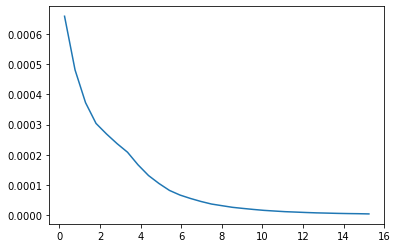

In [22]:
t = np.linspace(bns['time'][1], bns['time'][2], int(bns['time'][0]))
# print(bns['oa1.0'][0])
plt.plot(t, bns['oa1.0'][60][1:])
plt.show()